### ABOUT DATASET
THIS IS A BANK DATA WHICH GIVES INFORMATION ABOUT THE TRANSACTION. THERE ARE 16 COLUMN AND 2512 RECORDS.

### IMPORTING LIBRARIES AND SEEING THE DATA

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dt=pd.read_csv(r"C:\DATASCIENCE\DATASET\bank_transactions_data_2.csv")
print(dt.head())
print(dt.tail())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

### DATA CLEANING


In [3]:
dt.rename(columns={'IP Address' : 'IP_Address'},inplace=True)
print(dt.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP_Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

### BASIC INFORMATION ABOUT THE DATA

In [4]:
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP_Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
print(dt.isna().sum().sum())
print(dt.isna().sum())

0
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP_Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [6]:
dt['TransactionDate']=pd.to_datetime(dt['TransactionDate'])
dt['PreviousTransactionDate']=pd.to_datetime(dt['PreviousTransactionDate'])
print(dt.duplicated())
#print(dt1.head())

0       False
1       False
2       False
3       False
4       False
        ...  
2507    False
2508    False
2509    False
2510    False
2511    False
Length: 2512, dtype: bool


### BOXPLOT
#### TO CHECK WHETHER THERE IS OUTLAYERS

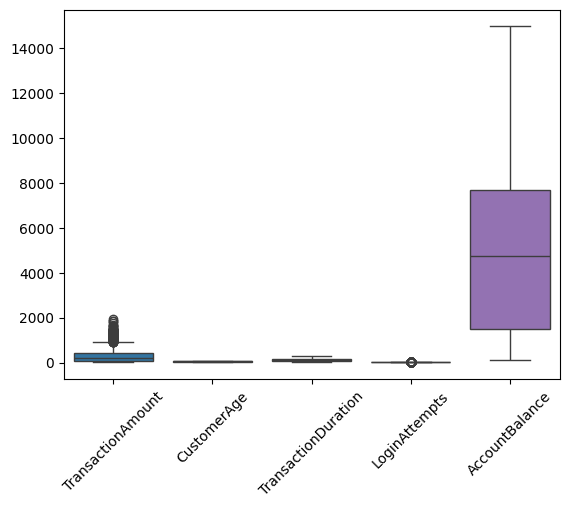

In [7]:
#print(dt.boxplot())
sns.boxplot(data=dt)
plt.xticks(rotation=45)
plt.show()

######  HERE THERE IS NO HIGH VARIATION IN OUTLAYERS ...SO THIS BOXPLOT IS OK..WE DON'T WANT TO REMOVE ANY INFORMATION

### RELATION BETWEEN VARIABLES 
#### RELATION IS DENOTED BETWEEN -1 TO 1 ..THE VALUES NEAR -1 HAS LESS RELATION AND VALUES NEAR TO 1 HAVE MORE RELATION AMONG THE VARIABLES

In [8]:
dt2=dt.corr(numeric_only=True)
print(dt2)

                     TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.025616             0.004359   
CustomerAge                  -0.025616     1.000000            -0.017936   
TransactionDuration           0.004359    -0.017936             1.000000   
LoginAttempts                -0.008445     0.007653             0.032639   
AccountBalance               -0.025165     0.319942             0.005577   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.008445       -0.025165  
CustomerAge               0.007653        0.319942  
TransactionDuration       0.032639        0.005577  
LoginAttempts             1.000000        0.014999  
AccountBalance            0.014999        1.000000  


In [9]:
dt.cov(numeric_only=True)

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,85232.609025,-133.056773,89.041404,-1.485935,-2.865947e+04
CustomerAge,-133.056773,316.562317,-22.326614,0.082059,2.220598e+04
TransactionDuration,89.041404,-22.326614,4894.927283,1.376202,1.522225e+03
LoginAttempts,-1.485935,0.082059,1.376202,0.363202,3.526259e+01
AccountBalance,-28659.468379,22205.984520,1522.225359,35.262585,1.521735e+07


### DESCRIPTION ABOUT THE DATA

In [10]:
dt.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512.000000,2512
mean,297.593778,2023-07-05 20:32:10.826433024,44.673965,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,81.885000,2023-04-03 16:22:05.750000128,27.000000,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,211.140000,2023-07-07 17:49:43.500000,45.000000,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,414.527500,2023-10-06 18:40:53.500000,59.000000,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23
std,291.946243,NaN,17.792198,69.963757,0.602662,3900.942499,NaN


### HEAT MAP
#### THIS MAP IS DUE TO CORRELATION .INTENSITY SHOW THE RELATION IN HEAT MAP
HERE CUSTOMER AGE AND ACCOUNT BALANCE IS RELATED

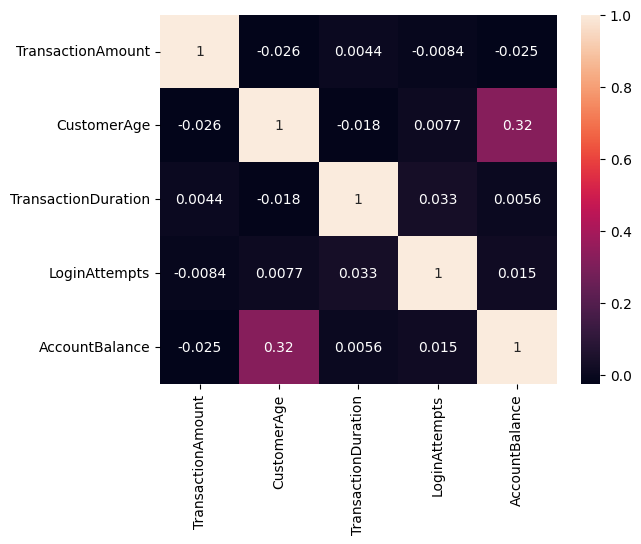

In [11]:
sns.heatmap(data=dt2,annot=True)
plt.show()

#### TRANSACTION TREND

##### 1.IN WHICH MONTH TRANSACTION IS MORE

In [12]:
dt['month']=dt['TransactionDate'].dt.month
monthly_trans=dt.groupby('month')['TransactionAmount'].sum()
maxmonth=monthly_trans.idxmax()
maxamnt=monthly_trans.max()
print(f"the month with highest transaction is {maxmonth}.")


the month with highest transaction is 9.


##### What are the peak periods for transactions?

month
1     220
2     218
3     197
4     161
5     220
6     212
7     195
8     224
9     214
10    226
11    221
12    204
Name: TransactionAmount, dtype: int64


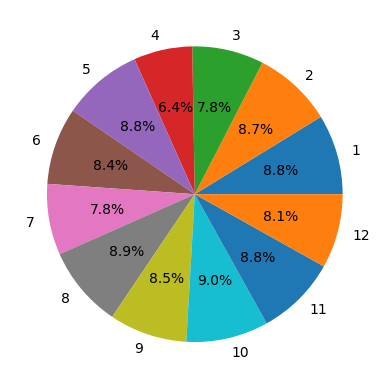

In [13]:
monthly=dt.groupby("month")['TransactionAmount'].agg(np.size)
print(monthly)
month=[1,2,3,4,5,6,7,8,9,10,11,12]
plt.pie(monthly,labels=month,autopct='%1.1f%%')
plt.show()

#####  WHAT IS THE AVERAGE TRANSACTION AMOUNT PER MONTH? 

month
1     299.837909
2     263.835321
3     309.828020
4     254.682236
5     285.763682
6     290.375377
7     301.853282
8     318.918571
9     340.337617
10    286.308053
11    298.873891
12    312.350147
Name: TransactionAmount, dtype: float64


C:\Users\Ayana\AppData\Local\Temp\ipykernel_1344\3224186542.py:1: FutureWarning: The provided callable <function mean at 0x0000023A7E84F7F0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg=dt.groupby('month')['TransactionAmount'].agg(np.mean)


([<matplotlib.patches.Wedge at 0x23a07befd60>,
 [Text(1.0617808006584288, 0.2874396134027907, '1'),
  Text(0.7962664983644734, 0.7589200640267592, '2'),
  Text(0.3288407624451643, 1.0496969814925083, '3'),
  Text(-0.21223742786447516, 1.0793309382267664, '4'),
  Text(-0.6836803573471892, 0.8617314947114442, '5'),
  Text(-1.0165183819871133, 0.4203455472373906, '6'),
  Text(-1.0907057429773175, -0.1426919137032575, '7'),
  Text(-0.8570955550383242, -0.6894832917000577, '8'),
  Text(-0.3377251299073889, -1.04687235928218, '9'),
  Text(0.26197803916035306, -1.0683480270949615, '10'),
  Text(0.7549773418923545, -0.8000057582474986, '11'),
  Text(1.058545303240818, -0.2991351550500284, '12')],
 [Text(0.5791531639955066, 0.15678524367424942, '8.4%'),
  Text(0.43432718092607636, 0.41395639856005045, '7.4%'),
  Text(0.17936768860645322, 0.5725619899050044, '8.7%'),
  Text(-0.11576586974425916, 0.5887259663055089, '7.1%'),
  Text(-0.3729165585530123, 0.4700353607516968, '8.0%'),
  Text(-0.55446

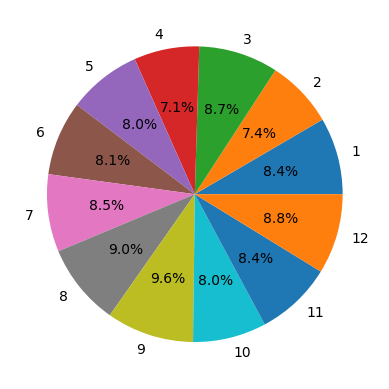

In [14]:
avg=dt.groupby('month')['TransactionAmount'].agg(np.mean)
print(avg)
month=[1,2,3,4,5,6,7,8,9,10,11,12]
plt.pie(avg,labels=month,autopct='%1.1f%%')

##### 2.IN WHICH LOCATION TRANSACTION ARE MORE


In [15]:
location_trans=dt.groupby('Location')['TransactionAmount'].sum()
maxloc=location_trans.idxmax()
print(f"the loc with highest transaction is {maxloc}.")


the loc with highest transaction is Austin.


##### 3.NO.OF TRANSACTION PER LOCATION

no.of transaction per location: Location
Albuquerque         41
Atlanta             61
Austin              59
Baltimore           51
Boston              61
Charlotte           68
Chicago             60
Colorado Springs    60
Columbus            54
Dallas              49
Denver              62
Detroit             63
El Paso             46
Fort Worth          70
Fresno              60
Houston             63
Indianapolis        58
Jacksonville        60
Kansas City         61
Las Vegas           55
Los Angeles         69
Louisville          51
Memphis             63
Mesa                61
Miami               64
Milwaukee           55
Nashville           55
New York            58
Oklahoma City       68
Omaha               65
Philadelphia        67
Phoenix             55
Portland            42
Raleigh             59
Sacramento          53
San Antonio         59
San Diego           59
San Francisco       57
San Jose            59
Seattle             61
Tucson              67
Virginia Beach  

<Axes: xlabel='Location'>

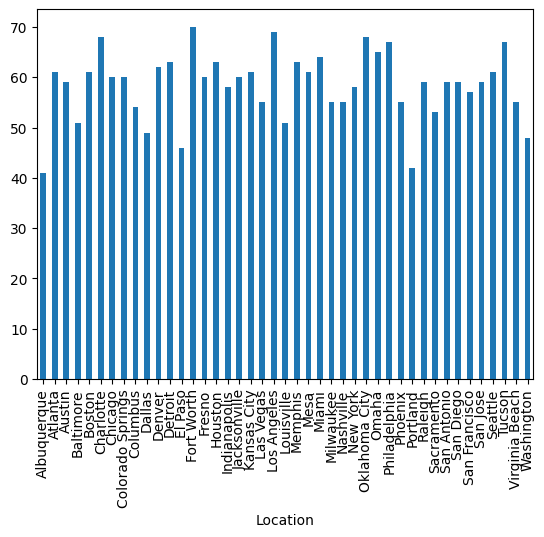

In [16]:
transperloc=dt.groupby('Location').size()
print("no.of transaction per location:",transperloc)
maxloc=transperloc.idxmax()
maxcnt=transperloc.max()
print(f"the location with the highest no.of transactions is {maxloc} with a total of {maxcnt} transaction.")
transperloc.plot(kind='bar')


##### 4.MOST COMMONLY USED TRANSACTION TYPE

In [17]:
comntype=dt.groupby('TransactionType')['TransactionAmount']
print(comntype.agg(np.size))
print("most commonly used TransactionType is")
print("debit")


TransactionType
Credit     568
Debit     1944
Name: TransactionAmount, dtype: int64
most commonly used TransactionType is
debit


##### 5.IN WHICH CHANNEL TRANSACTION IS RECURRENT


In [18]:
recurent=dt.groupby('Channel').size()
print(recurent)
d=recurent.sort_values(ascending=False)
print(d)
print(d[0])


Channel
ATM       833
Branch    868
Online    811
dtype: int64
Channel
Branch    868
ATM       833
Online    811
dtype: int64
868


C:\Users\Ayana\AppData\Local\Temp\ipykernel_1344\1383987046.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(d[0])


##### 6.LOCATION DISTRIBUTION BY TRANSACTION TYPE

In [19]:
distri=dt.groupby(['TransactionType','Location']).size()
print(distri.sort_values(ascending=False))


TransactionType  Location     
Debit            Charlotte        58
                 Fort Worth       55
                 Tucson           54
                 Los Angeles      54
                 Oklahoma City    53
                                  ..
Credit           Denver           10
                 Las Vegas        10
                 Washington       10
                 Columbus          9
                 El Paso           5
Length: 86, dtype: int64


##### 7.IN WHICH CUSTOMER AGE TRANSACTION IS MORE


CustomerAge
27    87
26    86
25    73
28    68
21    64
      ..
70    19
73    19
80    17
71    16
74    16
Length: 63, dtype: int64


<Axes: xlabel='CustomerAge'>

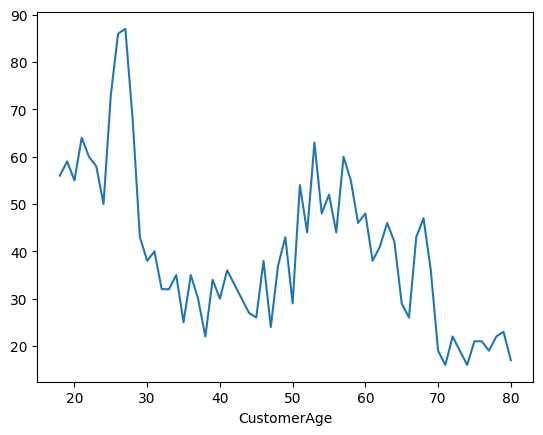

In [20]:
trans=dt.groupby('CustomerAge').size()
print(trans.sort_values(ascending=False))
trans.plot(kind='line')



##### 8.AVERAGE TRANSACTION AMOUNT IN CUSTOMER AGE

<pandas.core.groupby.generic.SeriesGroupBy object at 0x0000023A07EDB970> CustomerAge
18    304.717321
19    349.641864
20    342.913455
21    282.481562
22    344.146500
         ...    
76    197.196667
77    216.691579
78    414.876364
79    320.613043
80    312.780000
Name: TransactionAmount, Length: 63, dtype: float64


C:\Users\Ayana\AppData\Local\Temp\ipykernel_1344\2931111885.py:2: FutureWarning: The provided callable <function mean at 0x0000023A7E84F7F0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_amount=dt.groupby('CustomerAge')['TransactionAmount'].agg(np.mean)


<Axes: xlabel='CustomerAge'>

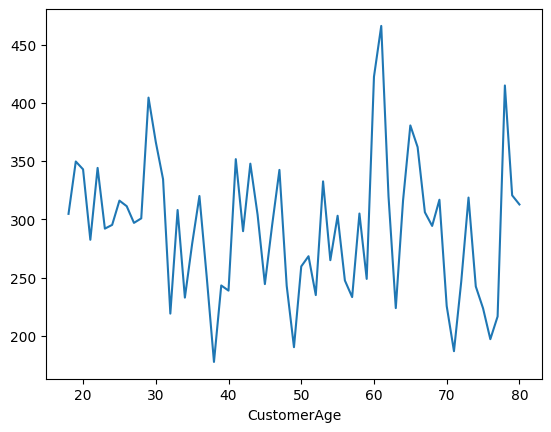

In [21]:
age=dt.groupby('CustomerAge')['TransactionAmount']
mean_amount=dt.groupby('CustomerAge')['TransactionAmount'].agg(np.mean)
print(age,mean_amount)
mean_amount.plot(kind='line')


##### 9.NO.OF CUSTOMERS ARE THERE IN EACH CUSTOMER OCCUPATION

CustomerOccupation
Doctor      631
Engineer    625
Retired     599
Student     657
Name: TransactionID, dtype: int64


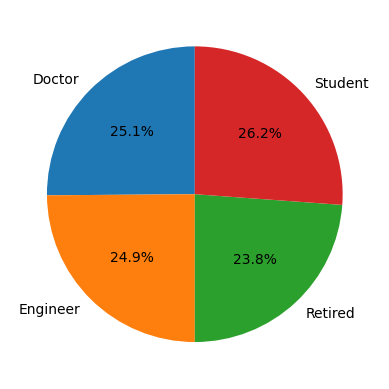

In [22]:
OCCUPATION=dt.groupby('CustomerOccupation')['TransactionID']
cust_NUM=dt.groupby('CustomerOccupation')['TransactionID'].agg(np.size)
print(cust_NUM)
#cust_NUM.plot(kind='line')
Mylabels=["Doctor","Engineer","Retired",'Student']
myexplode=[631,625,599,657]
plt.pie(cust_NUM,labels=Mylabels,startangle=90,autopct='%1.1f%%')
plt.show()

##### 10.MINIMUM TRANSACTION AMOUNT

In [23]:
min(dt['TransactionAmount'])

0.26

##### 11.MAXIMUM TRANSACTION AMOUNT

In [24]:
max(dt['TransactionAmount'])

1919.11

##### 12.AVERAGE TRANSACTION DURATION IN EACH AGE GROUP

CustomerAge
18    142.892857
38    141.818182
65    140.482759
41    140.444444
42    139.363636
         ...    
76    101.904762
72    101.636364
24    101.380000
32     94.250000
31     89.450000
Name: TransactionDuration, Length: 63, dtype: float64
CustomerAge
18    142.892857
19    127.694915
20    132.490909
21    123.812500
22    118.183333
         ...    
76    101.904762
77    139.315789
78    112.727273
79    130.956522
80    110.000000
Name: TransactionDuration, Length: 63, dtype: float64


C:\Users\Ayana\AppData\Local\Temp\ipykernel_1344\1797300086.py:1: FutureWarning: The provided callable <function mean at 0x0000023A7E84F7F0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avrg_trans=dt.groupby('CustomerAge')['TransactionDuration'].agg(np.mean)


<Axes: xlabel='CustomerAge'>

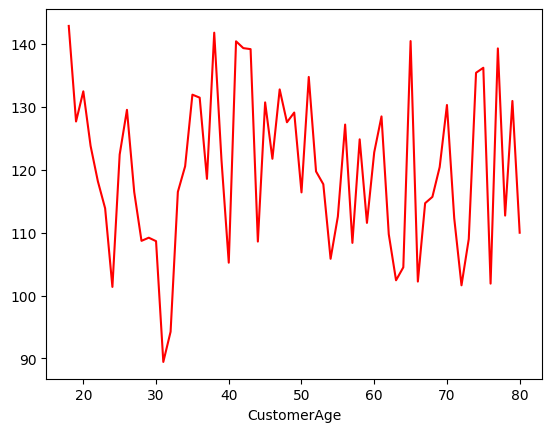

In [25]:
avrg_trans=dt.groupby('CustomerAge')['TransactionDuration'].agg(np.mean)
print(avrg_trans.sort_values(ascending=False))
print(avrg_trans)
avrg_trans.plot(kind='line',color='red')




##### MINIMUM DURATION BY WHICH customer age

CustomerAge
70    50
75    37
77    35
61    31
73    31
      ..
31    10
48    10
39    10
27    10
67    10
Name: TransactionDuration, Length: 63, dtype: int64
CustomerAge
18    13
19    12
20    15
21    17
22    12
      ..
76    20
77    35
78    23
79    30
80    21
Name: TransactionDuration, Length: 63, dtype: int64


C:\Users\Ayana\AppData\Local\Temp\ipykernel_1344\422067227.py:1: FutureWarning: The provided callable <function min at 0x0000023A7E84F010> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  avrg_trans=dt.groupby('CustomerAge')['TransactionDuration'].agg(np.min)


<Axes: xlabel='CustomerAge'>

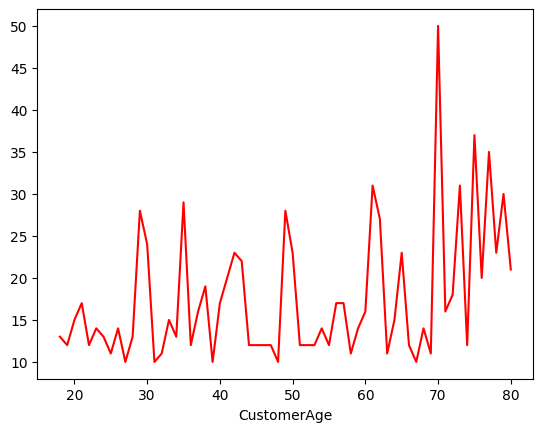

In [26]:
avrg_trans=dt.groupby('CustomerAge')['TransactionDuration'].agg(np.min)
print(avrg_trans.sort_values(ascending=False))
print(avrg_trans)
avrg_trans.plot(kind='line',color='red')

##### DISTRIBUTION OF CUSTOMER AGES

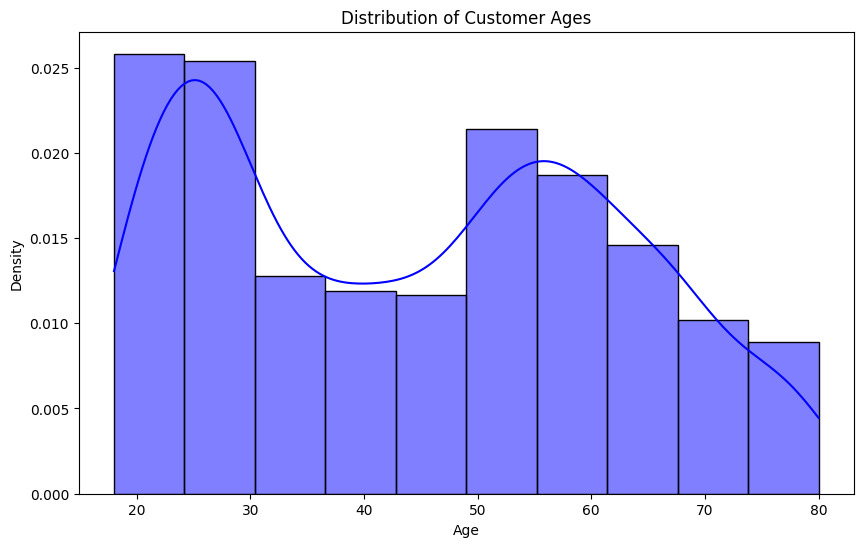

In [27]:
x=dt['CustomerAge']
plt.figure(figsize=(10,6))
sns.histplot(x, kde=True, bins=10, color='blue', stat='density')

# Adding titles and labels
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Density')

# Show the plot
plt.show()

##### How does transaction behavior differ by age group?

    CustomerAge  avg_transaction_amount  transaction_count  \
0            18              304.717321                 56   
1            19              349.641864                 59   
2            20              342.913455                 55   
3            21              282.481562                 64   
4            22              344.146500                 60   
..          ...                     ...                ...   
58           76              197.196667                 21   
59           77              216.691579                 19   
60           78              414.876364                 22   
61           79              320.613043                 23   
62           80              312.780000                 17   

   avg_transaction_type  
0                 Debit  
1                 Debit  
2                 Debit  
3                 Debit  
4                 Debit  
..                  ...  
58                Debit  
59                Debit  
60                Deb

C:\Users\Ayana\AppData\Local\Temp\ipykernel_1344\1775328037.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerAge', y='avg_transaction_amount', data=transaction_summary, palette='viridis')


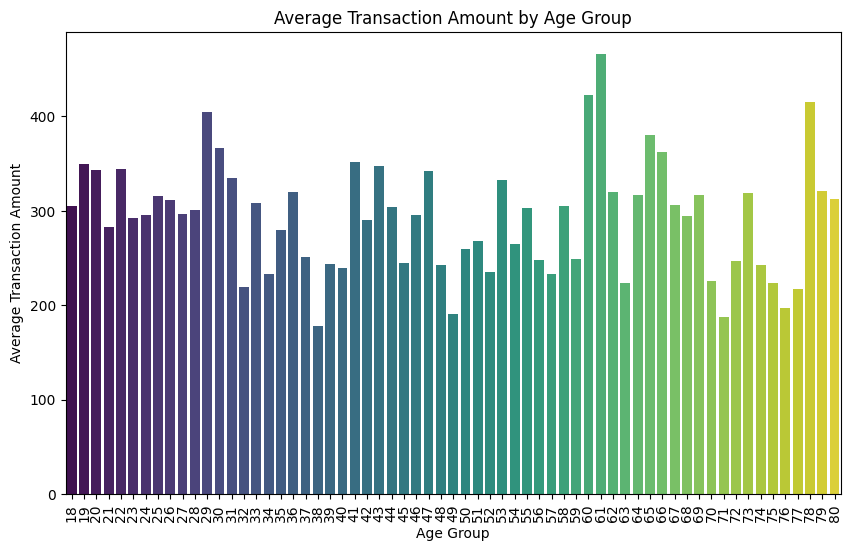

C:\Users\Ayana\AppData\Local\Temp\ipykernel_1344\1775328037.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerAge', y='transaction_count', data=transaction_summary, palette='plasma')


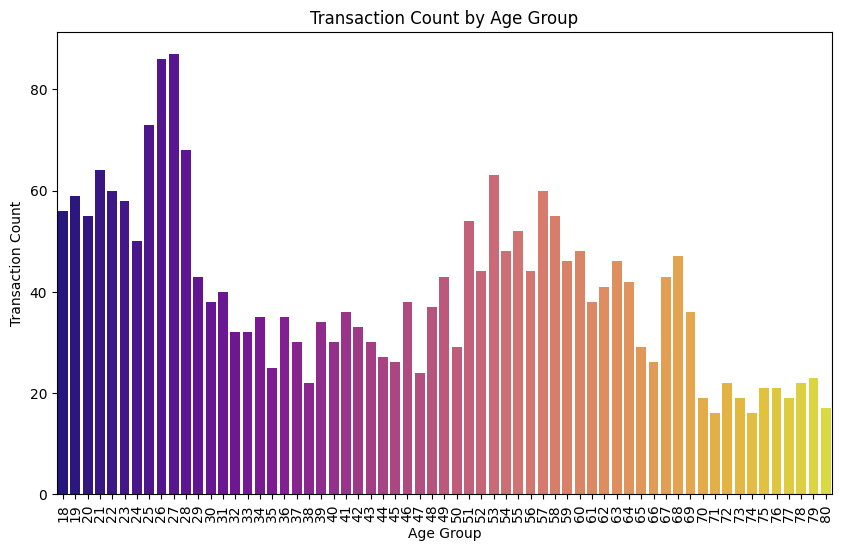

In [28]:
transaction_summary = dt.groupby('CustomerAge').agg(
    avg_transaction_amount=('TransactionAmount', 'mean'),
    transaction_count=('TransactionID', 'count'),
    avg_transaction_type=('TransactionType', lambda x: x.mode()[0])  # Most frequent transaction type
).reset_index()

# Print summary
print(transaction_summary)

# Plotting transaction behavior by age group
plt.figure(figsize=(10,6))

# Plot the average transaction amount by age group
sns.barplot(x='CustomerAge', y='avg_transaction_amount', data=transaction_summary, palette='viridis')
plt.title('Average Transaction Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=90)
plt.show()

# Plot the transaction count by age group
plt.figure(figsize=(10,6))
sns.barplot(x='CustomerAge', y='transaction_count', data=transaction_summary, palette='plasma')
plt.title('Transaction Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Transaction Count')
plt.xticks(rotation=90)
plt.show()

### SUMMARY


This ia a data of bank transaction with 16 columns and 2512 enteries.The columns are such as transaction id ,transaction amount ,customer age etc.This data  represent a collection of transactional and customer information, possibly for monitoring or analyzing financial transactions,  or customer behavior.

There are no strong correlations between transaction-related variables like Transaction Amount and Transaction Duration, suggesting that the transaction amount is not a reliable predictor of how long a transaction will take.
Customer Age shows some relationship with Account Balance, but overall, the correlations between customer demographics and transaction details are weak.
The number of Login Attempts is minimally correlated with other variables, which may suggest that login behavior is mostly independent of transaction characteristics.Overall, the data reveals weak correlations between various attributes, meaning that changes in one variable (e.g., Transaction Amount) do not strongly influence the others (e.g., Customer Age, Transaction Duration, or Login Attempts). This may suggest that these factors are largely independent when it comes to the specific transactions observed in this dataset.

The month with the highest number of transactions is October (Month 10) with 226 transactions.
The peak periods for transactions based on the provided data are:
October (Month 10): 226 transactions
August (Month 8): 224 transactions
November (Month 11): 221 transactions
These months show the highest transaction volumes, indicating potential seasonal peaks or periods of increased customer activity and highest transaction amount was in month 9.highest and lowest transaction amount are 1919.11 and .26 respectively.The highest average transaction amount occurred in September (340.34), while the lowest was in April (254.68) and the location with highest transaction is Austin.
Fort Worth has the highest number of transactions, with 70, while Portland has the lowest with 42.
Several locations show fairly high transaction volumes, such as Charlotte, Philadelphia, and Oklahoma City (ranging between 65-70 transactions), indicating active regions for transactions.

 The majority of transactions in the dataset are Debit transactions, indicating that customers are more likely to make withdrawals, purchases, or transfers compared to credit-based transactions.

 Branch locations have the highest frequency of transactions, followed by ATMs and Online channels. This suggests that physical branches are still a primary channel for transaction activity, but online and ATM channels are also heavily used

 Locations such as Charlotte and Fort Worth have high volumes of Debit transactions, while Credit transactions are spread out with lower frequencies in various locations.

The most common transaction type is Debit, significantly outnumbering Credit transactions.
The Branch channel leads in transaction volume, with ATM and Online transactions following.
Debit transactions are more prevalent across most locations, while Credit transactions are sparse and concentrated in a few cities.
Age 27 has the highest number of transactions, followed by Age 26 and Age 25.
Young customers (around ages 18-20) have higher average transaction amounts, while older customers also exhibit significant transaction amounts.
Students represent the largest group of customers, while Doctors and Engineers are also well-represented.
Younger customers tend to have longer transaction durations, while older customers process transactions more quickly.
The minimum transaction durations are lower for younger customers, indicating faster transactions, with older customers taking longer to complete their transactions.when we analyse trnsaction behaviour among age group,A bar plot can be used to visualize the average transaction amount by age. The trend likely shows higher average transaction amounts for younger groups and a decline as age increases, with some exceptions.
Younger age groups (18-20) tend to spend more per transaction on average, but their total number of transactions is still relatively high.
Older customers (75 and above) exhibit a lower average transaction amount but tend to make fewer transactions overall.
The most common transaction type across all age groups is Debit, indicating that the transaction type is consistent regardless of age.
This behavior may suggest that younger customers are more engaged in higher-value transactions, possibly due to spending habits or frequency of transactions, while older customers may engage less frequently but with similar transaction types.
